In [146]:
from google.colab import drive # 드라이브 연동
import pandas as pd
drive.mount('/content/drive') # 드라이브 경로
ndt = '/content/drive/MyDrive/Colab Notebooks/pvdt.csv' # 파일 위치


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
pv = pd.read_csv(ndt)
print(pv)

     year  month  day      누적발전량   일간발전량          일시
0    2021      5    1  162585.09   76.21  2021-05-01
1    2021      5    2  162661.30  303.70  2021-05-02
2    2021      5    3  162965.00  323.09  2021-05-03
3    2021      5    4  163288.09  165.91  2021-05-04
4    2021      5    5  163454.00  311.00  2021-05-05
..    ...    ...  ...        ...     ...         ...
481  2022      8   26  266715.00  318.09  2022-08-26
482  2022      8   27  267033.09  279.10  2022-08-27
483  2022      8   28  267312.19  333.00  2022-08-28
484  2022      8   29  267645.19  100.00  2022-08-29
485  2022      8   30  267745.19   59.81  2022-08-30

[486 rows x 6 columns]


In [148]:
pv = pv.rename(columns={
    '일시': 'ds',
    '일간발전량': 'y'
})

In [149]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
model1 = Prophet()
model1.fit(pv)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/zzu3lwfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/afbp5lt6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53387', 'data', 'file=/tmp/tmpshki2fnh/zzu3lwfb.json', 'init=/tmp/tmpshki2fnh/afbp5lt6.json', 'output', 'file=/tmp/tmpshki2fnh/prophet_model0k8pubvo/prophet_model-20221213102806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future1 = model1.make_future_dataframe(periods=365)
forecast1 = model1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
846,2023-08-26,256.387823,148.944168,368.452393,251.592072,261.223416,-2.453532,-2.453532,-2.453532,-2.453532,-2.453532,-2.453532,0.0,0.0,0.0,253.934291
847,2023-08-27,256.459356,165.178735,370.907377,251.635308,261.318192,13.024183,13.024183,13.024183,13.024183,13.024183,13.024183,0.0,0.0,0.0,269.483539
848,2023-08-28,256.530889,137.501475,351.974487,251.679092,261.412967,-11.584360,-11.584360,-11.584360,-11.584360,-11.584360,-11.584360,0.0,0.0,0.0,244.946529
849,2023-08-29,256.602422,141.458872,354.957293,251.722947,261.507681,-5.126803,-5.126803,-5.126803,-5.126803,-5.126803,-5.126803,0.0,0.0,0.0,251.475619
850,2023-08-30,256.673955,139.839512,354.921500,251.767728,261.606035,-4.462315,-4.462315,-4.462315,-4.462315,-4.462315,-4.462315,0.0,0.0,0.0,252.211640


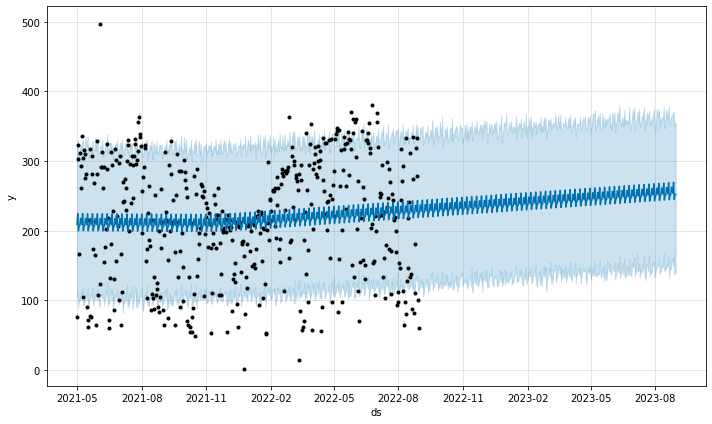

In [ ]:
fig1 = model1.plot(forecast1)

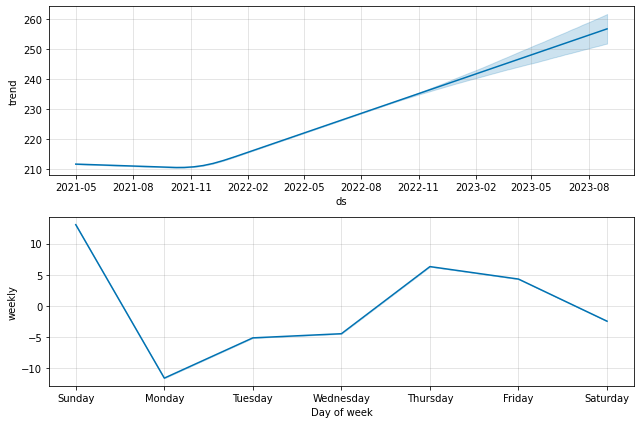

In [ ]:
fig1_1 = model1.plot_components(forecast1) 

In [ ]:
model2 = Prophet(
    yearly_seasonality = True,
    weekly_seasonality = True,
    daily_seasonality = False,
    
)

model2.fit(pv)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/dnlk9oul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/i316l9pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96672', 'data', 'file=/tmp/tmpshki2fnh/dnlk9oul.json', 'init=/tmp/tmpshki2fnh/i316l9pt.json', 'output', 'file=/tmp/tmpshki2fnh/prophet_modelabud00pg/prophet_model-20221213102759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future2 = model2.make_future_dataframe(periods=365)

forecast2 = model2.predict(future2)

forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
846,2023-08-26,229.725252,84.061970,273.262579,229.724614,229.725934,-52.065701,-52.065701,-52.065701,-2.655700,-2.655700,-2.655700,-49.410001,-49.410001,-49.410001,0.0,0.0,0.0,177.659551
847,2023-08-27,229.753497,98.972952,293.457000,229.752857,229.754182,-33.542776,-33.542776,-33.542776,12.979282,12.979282,12.979282,-46.522058,-46.522058,-46.522058,0.0,0.0,0.0,196.210720
848,2023-08-28,229.781741,84.168105,282.233032,229.781101,229.782430,-54.690157,-54.690157,-54.690157,-11.540418,-11.540418,-11.540418,-43.149739,-43.149739,-43.149739,0.0,0.0,0.0,175.091584
849,2023-08-29,229.809985,96.605848,290.376203,229.809342,229.810677,-43.940054,-43.940054,-43.940054,-4.589246,-4.589246,-4.589246,-39.350808,-39.350808,-39.350808,0.0,0.0,0.0,185.869931
850,2023-08-30,229.838230,91.122589,291.108373,229.837584,229.838925,-39.929843,-39.929843,-39.929843,-4.739384,-4.739384,-4.739384,-35.190459,-35.190459,-35.190459,0.0,0.0,0.0,189.908386


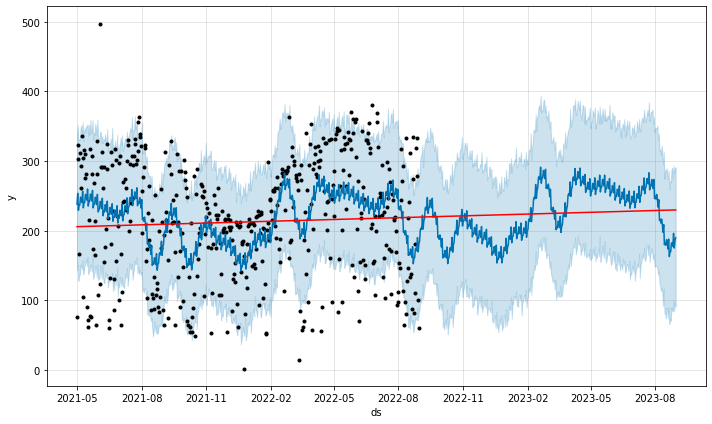

In [ ]:
fig2 = model2.plot(forecast2)
b = add_changepoints_to_plot(fig2.gca(),model2, forecast2)

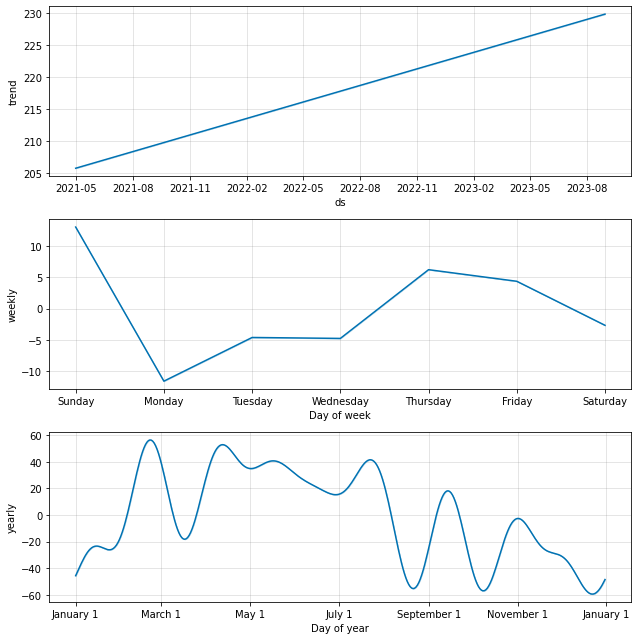

In [ ]:
fig2_1 = model2.plot_components(forecast2)

In [151]:
model3 = Prophet(
    
    changepoint_prior_scale=0.15,   
    yearly_seasonality = 15,
    weekly_seasonality = True,
    daily_seasonality = False,
    seasonality_mode = "multiplicative",

)

model3.fit(pv)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/i0itjtsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpshki2fnh/n3ul02m8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68275', 'data', 'file=/tmp/tmpshki2fnh/i0itjtsy.json', 'init=/tmp/tmpshki2fnh/n3ul02m8.json', 'output', 'file=/tmp/tmpshki2fnh/prophet_modelqxuy2_bo/prophet_model-20221213113756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future3 = model3.make_future_dataframe(periods=365)
forecast3 = model3.predict(future3)
forecast3.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
846,2023-08-26,134.022972,4.522249,199.979479,115.760915,152.103999,-0.197215,-0.197215,-0.197215,-0.014326,-0.014326,-0.014326,-0.182889,-0.182889,-0.182889,0.0,0.0,0.0,107.591656
847,2023-08-27,133.849136,24.162882,215.770431,115.485212,152.058427,-0.106968,-0.106968,-0.106968,0.059333,0.059333,0.059333,-0.166301,-0.166301,-0.166301,0.0,0.0,0.0,119.531546
848,2023-08-28,133.675299,7.159188,196.848940,115.226467,152.010193,-0.201250,-0.201250,-0.201250,-0.053199,-0.053199,-0.053199,-0.148051,-0.148051,-0.148051,0.0,0.0,0.0,106.773098
849,2023-08-29,133.501463,19.086442,218.741013,114.960816,151.944835,-0.147237,-0.147237,-0.147237,-0.018411,-0.018411,-0.018411,-0.128826,-0.128826,-0.128826,0.0,0.0,0.0,113.845066
850,2023-08-30,133.327626,16.377917,218.810047,114.667694,151.862215,-0.131665,-0.131665,-0.131665,-0.022328,-0.022328,-0.022328,-0.109337,-0.109337,-0.109337,0.0,0.0,0.0,115.772998


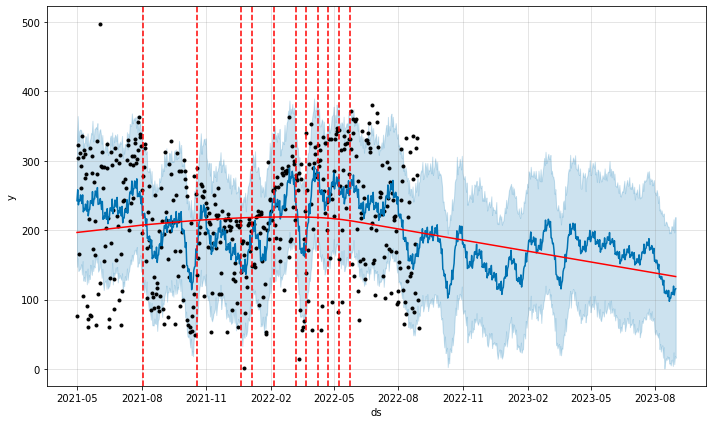

In [ ]:
fig3 = model3.plot(forecast3)
a = add_changepoints_to_plot(fig3.gca(),model3, forecast3)

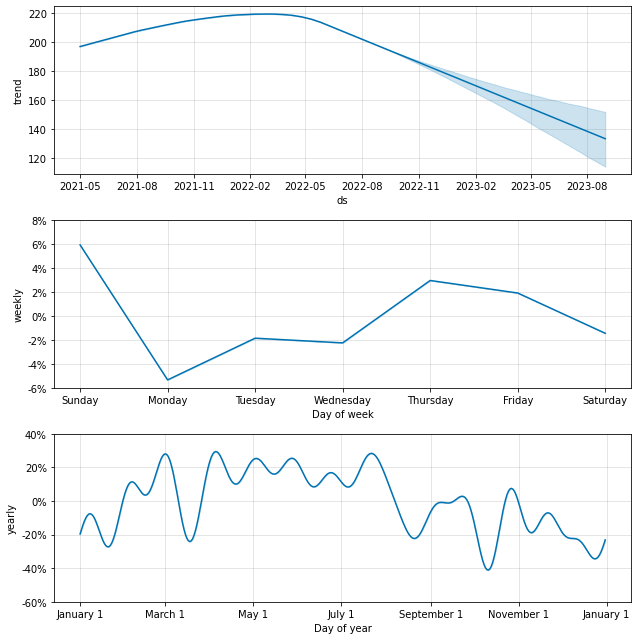

In [ ]:
fig3_1 = model3.plot_components(forecast3)

--------------------------------------- 아래부터는 예측 검증 ---------------------------------------

In [152]:
train = pv.drop(pv.index[-122:]) # 22년 5월 전까지 데이터를 훈련데이터로 사용
y_true = pv['y'][-122:].values   # 5월 이전 일간발전량 데이터 값을 추출
print(train)

     year  month  day      누적발전량       y          ds
0    2021      5    1  162585.09   76.21  2021-05-01
1    2021      5    2  162661.30  303.70  2021-05-02
2    2021      5    3  162965.00  323.09  2021-05-03
3    2021      5    4  163288.09  165.91  2021-05-04
4    2021      5    5  163454.00  311.00  2021-05-05
..    ...    ...  ...        ...     ...         ...
359  2022      4   26  238270.00  160.41  2022-04-26
360  2022      4   27  238430.41  331.59  2022-04-27
361  2022      4   28  238762.00  245.00  2022-04-28
362  2022      4   29  239007.00   97.00  2022-04-29
363  2022      4   30  239104.00  265.00  2022-04-30

[364 rows x 6 columns]


In [ ]:
test_sample = list()
for i in range(5, 9):
  for j in range(1,31):
    st = '2022-'+ str(i)+ '-'+str(j)
    test_sample.append([st])
    if(i%2 == 1) & (j == 30):   # 홀수달 31일 추가
      test_sample.append(['2022-%d-31' %i])

test_sample = pd.DataFrame(test_sample, columns = ['ds'])
test_sample['ds']= pd.to_datetime(test_sample['ds'])
print(test_sample)

            ds
0   2022-05-01
1   2022-05-02
2   2022-05-03
3   2022-05-04
4   2022-05-05
..         ...
117 2022-08-26
118 2022-08-27
119 2022-08-28
120 2022-08-29
121 2022-08-30

[122 rows x 1 columns]


In [ ]:
forcast4_train = model2.predict(train)
forcast4_test = model2.predict(test_sample)

y_pred = forcast4_test['yhat'].values
print(y_pred)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

[264.0039885  239.4598156  246.53712885 246.64776692 257.95888435
 256.58450408 250.12078078 266.34538147 242.43863807 250.0023788
 250.44173425 261.92174962 260.55875831 253.95535716 269.89940143
 245.58468825 252.62925112 252.45657841 263.2516052  261.15145174
 253.77976707 268.94511307 243.86107414 250.16402977 249.29391594
 259.44983547 256.78049894 248.91836036 263.67788634 238.27564396
 244.34814273 243.33275152 253.4235436  250.76204235 242.97172056
 257.85667973 232.62218086 238.892948   238.09455066 248.40970391
 245.96944449 238.38802314 253.46192716 228.39069502 234.79543517
 234.1003491  244.48909301 242.09593454 234.54054494 249.62684363
 224.56356154 230.9824426  230.3193922  240.77041749 238.48232798
 231.08704957 246.39998295 221.64008646 228.44761708 228.26485195
 239.29164813 237.67582113 231.04720582 247.2158393  223.39195332
 231.20371432 232.0780366  244.19632669 243.6851374  238.15059125
 255.37700635 232.54740365 241.26182356 242.91876503 255.6715918
 255.6198696

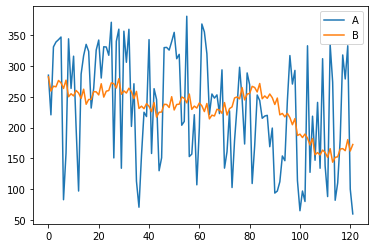

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_true, label='A') # 실제 값
pyplot.plot(y_pred, label='B') # 예측 값
pyplot.legend()
pyplot.show()